In [14]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.regularizers import l2

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)


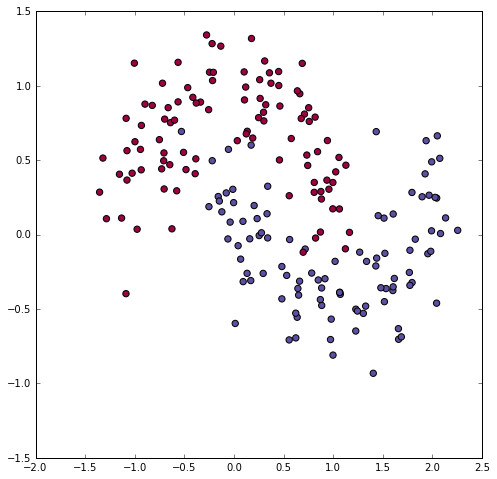

In [15]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
y_onehot = np.eye(2)[y]
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [16]:
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [30]:
model = Sequential()
model.add(Dense(output_dim=10, input_dim=2, init="lecun_uniform")
model.add(Activation("tanh"))
model.add(Dense(output_dim=2, input_dim=10, init="lecun_uniform"))
model.add(Activation("softmax"))
model.compile(loss='categorical_crossentropy', optimizer='sgd')

SyntaxError: invalid syntax (<ipython-input-30-c7decf2b3def>, line 3)

In [27]:
model.fit(X, y_onehot, nb_epoch=20000, batch_size=X.shape[0], verbose=0)

In [28]:
model.evaluate(X, y_onehot, batch_size=X.shape[0])

200/200 [==============================] - 0s


0.13063496351242065

151208/151208 [==============================] - 1s     


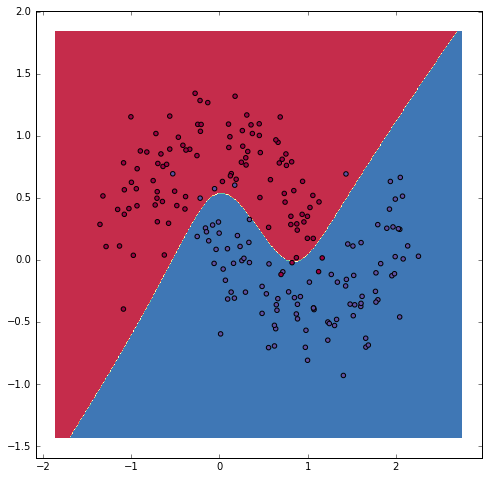

In [29]:
plot_decision_boundary(lambda x: model.predict_classes(x))